# Data exploration
This notebook performs some basic data exploration on the dataset, to understand the data better and to get some insights that can be useful for the feature processes.

### Library imports

In [2]:
import kaggle, os, random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Downloading and Sampling Datasets
The dataset chosen is the [eCommerce behavior data from multi category store](https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/) dataset. The dataset consists of two files containing the following columns:
- **event_time**: Time when event happened at (in UTC).
- **event_type**: Either view, cart, purchase, remove from cart.
- **product_id**: ID of a product
- **category_id**: Product's category ID
- **category_code**: Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.
- **brand**: Downcased string of brand name, when present.
- **price**: Float price of a product.
- **user_id**: Permanent user ID.

In [3]:
if not os.path.exists('../../../datasets/2019-Nov.csv') and os.path.exists('../../../datasets/2019-Oct.csv'):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('mkechinov/ecommerce-behavior-data-from-multi-category-store', path='../../../datasets', unzip=True)

    df = pd.read_csv('../../../datasets/2019-Nov.csv')
    df = df.sample(frac=0.5)
    df.to_csv('../../datasets/2019-Nov.csv', index=False)

    df = pd.read_csv('../../../datasets/2019-Oct.csv')
    df = df.sample(frac=0.5)
    df.to_csv('../../datasets/2019-Oct.csv', index=False)

## Dataset enrichment
The following columns of synthetic data were added to increase the dataset's value:
- **session_duration**: The duration of the user session in seconds.
- **visit_count**: The number of times a user visited the website.
- **age**: The age of the user.
- **gender**: The gender of the user.

In [ ]:
def generate_age(event_type):
    """
    Generate a random age based on the event type.

    Parameters:
    event_type (str): The type of event. Can be "view", "add_to_cart", or "purchase".

    Returns:
    int: A randomly generated age within a specific range based on the event type.
         - "view": Age between 18 and 35.
         - "add_to_cart": Age between 25 and 50.
         - "purchase": Age between 30 and 65.
         - Any other event type: Age between 18 and 65.
    """
    if event_type == "view":
        return random.randint(18, 35)
    elif event_type == "add_to_cart":
        return random.randint(25, 50)
    elif event_type == "purchase":
        return random.randint(30, 65)
    return random.randint(18, 65)

def generate_gender(event_type):
    """
    Generate a random gender based on the event type.

    Parameters:
    event_type (str): The type of event, which can be "view" or "purchase".

    Returns:
    str: A randomly selected gender ("Male" or "Female") with probabilities
         depending on the event type:
         - "view": 40% Male, 60% Female
         - "purchase": 60% Male, 40% Female
         - other: 50% Male, 50% Female
    """
    if event_type == "view":
        return np.random.choice(["Male", "Female"], p=[0.4, 0.6])
    elif event_type == "purchase":
        return np.random.choice(["Male", "Female"], p=[0.6, 0.4])
    return np.random.choice(["Male", "Female"], p=[0.5, 0.5])

def generate_session_duration(event_type):
    """
    Generate a random session duration based on the event type.

    Parameters:
    event_type (str): The type of event. Can be "view", "add_to_cart", or "purchase".

    Returns:
    int: A randomly generated session duration within a specific range based on the event type.
    """
    event_metrics = {
        "view": {"duration": (30, 300)},
        "add_to_cart": {"duration": (300, 900)},
        "purchase": {"duration": (600, 1800)},
    }
    return random.randint(*event_metrics.get(event_type, {"duration": (30, 300)})["duration"])

def generate_visit_count(event_type):
    """
    Generate a random visit count based on the event type.

    Parameters:
    event_type (str): The type of event. Can be "view", "add_to_cart", or "purchase".

    Returns:
    int: A randomly generated visit count within a specific range based on the event type.
    """
    event_metrics = {
        "view": {"visits": (1, 3)},
        "add_to_cart": {"visits": (2, 5)},
        "purchase": {"visits": (3, 10)},
    }
    return random.randint(*event_metrics.get(event_type, {"visits": (1, 3)})["visits"])

def enrich_dataset(input_file, output_file):
    df = pd.read_csv(input_file)

    df["session_duration"] = df["event_type"].map(generate_session_duration)
    df["visit_count"] = df["event_type"].map(generate_visit_count)
    df["age"] = df["event_type"].map(generate_age)
    df["gender"] = df["event_type"].map(generate_gender)
    df.to_csv(output_file, index=False)

In [5]:
random.seed(42)
np.random.seed(42)

if not os.path.exists('../../../datasets/enriched_2019-Oct.csv'):
    enrich_dataset("../../../datasets/2019-Oct.csv", "../../../datasets/enriched_2019-Oct.csv")
if not os.path.exists('../../../datasets/enriched_2019-Nov.csv'):
    enrich_dataset("../../../datasets/2019-Nov.csv", "../../../datasets/enriched_2019-Nov.csv")

## Data exploration

In [4]:
if not os.path.exists("../../../datasets/enriched_2019-Oct-sample.csv"):
    df_oct = pd.read_csv("../../../datasets/enriched_2019-Oct.csv")
    df_oct_sample = df_oct.sample(frac=0.1, random_state=42)
    df_oct_sample.to_csv("../../datasets/enriched_2019-Oct-sample.csv", index=False)
elif not os.path.exists("../../../datasets/enriched_2019-Nov-sample.csv"):
    df_nov = pd.read_csv("../../../datasets/enriched_2019-Nov.csv")
    df_nov_sample = df_nov.sample(frac=0.1, random_state=42)
    df_nov_sample.to_csv("../../datasets/enriched_2019-Nov-sample.csv", index=False)

In [5]:
df_oct_sample = pd.read_csv("../../../datasets/enriched_2019-Oct-sample.csv")
df_nov_sample = pd.read_csv("../../../datasets/enriched_2019-Nov-sample.csv")

`info()` function is used to get a concise summary of the dataframe, showing the column names, the data type of each column, and memory usage.

In [8]:
print("October Data Sample Info:")
print(df_oct_sample.info())

October Data Sample Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   event_time        object 
 1   event_type        object 
 2   product_id        int64  
 3   category_id       int64  
 4   category_code     object 
 5   brand             object 
 6   price             float64
 7   user_id           int64  
 8   user_session      object 
 9   session_duration  int64  
 10  visit_count       int64  
 11  age               int64  
 12  gender            object 
dtypes: float64(1), int64(6), object(6)
memory usage: 210.5+ MB
None


In [9]:
print("\nNovember Data Sample Info:")
print(df_nov_sample.info())


November Data Sample Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700079 entries, 13657053 to 16251244
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   event_time        object 
 1   event_type        object 
 2   product_id        int64  
 3   category_id       int64  
 4   category_code     object 
 5   brand             object 
 6   price             float64
 7   user_id           int64  
 8   user_session      object 
 9   session_duration  int64  
 10  visit_count       int64  
 11  age               int64  
 12  gender            object 
dtypes: float64(1), int64(6), object(6)
memory usage: 288.4+ MB
None


`describe()` function is used to generate descriptive statistics of the data such as mean, median, standard deviation, etc.

In [10]:
print("October Data Sample Statistics:")
print(df_oct_sample.describe())

October Data Sample Statistics:
         product_id   category_id         price       user_id  \
count  2.122438e+06  2.122438e+06  2.122438e+06  2.122438e+06   
mean   1.056432e+07  2.057396e+18  2.903521e+02  5.335407e+08   
std    1.189062e+07  1.840649e+16  3.585620e+02  1.852478e+07   
min    1.000978e+06  2.053014e+18  0.000000e+00  2.262430e+08   
25%    1.005157e+06  2.053014e+18  6.590000e+01  5.159086e+08   
50%    5.000503e+06  2.053014e+18  1.621700e+02  5.297132e+08   
75%    1.600091e+07  2.053014e+18  3.585700e+02  5.515679e+08   
max    6.050001e+07  2.175420e+18  2.574070e+03  5.662804e+08   

       session_duration   visit_count           age  
count      2.122438e+06  2.122438e+06  2.122438e+06  
mean       1.831559e+02  2.077379e+00  2.719392e+01  
std        1.630820e+02  1.044178e+00  6.636410e+00  
min        3.000000e+01  1.000000e+00  1.800000e+01  
25%        9.800000e+01  1.000000e+00  2.200000e+01  
50%        1.680000e+02  2.000000e+00  2.700000e+01  
75% 

In [11]:
print("\nNovember Data Sample Statistics:")
print(df_nov_sample.describe())


November Data Sample Statistics:
         product_id   category_id         price       user_id  \
count  2.700079e+06  2.700079e+06  2.700079e+06  2.700079e+06   
mean   1.252960e+07  2.057893e+18  2.923488e+02  5.386608e+08   
std    1.725840e+07  2.012025e+16  3.558067e+02  2.292586e+07   
min    1.000978e+06  2.053014e+18  0.000000e+00  4.179846e+07   
25%    1.306092e+06  2.053014e+18  6.924000e+01  5.164886e+08   
50%    5.100573e+06  2.053014e+18  1.655100e+02  5.350950e+08   
75%    1.730076e+07  2.053014e+18  3.603400e+02  5.611094e+08   
max    1.000285e+08  2.187708e+18  2.574070e+03  5.799683e+08   

       session_duration   visit_count           age  
count      2.700079e+06  2.700079e+06  2.700079e+06  
mean       1.791254e+02  2.062279e+00  2.745257e+01  
std        1.482381e+02  9.998760e-01  7.108989e+00  
min        3.000000e+01  1.000000e+00  1.800000e+01  
25%        9.800000e+01  1.000000e+00  2.200000e+01  
50%        1.670000e+02  2.000000e+00  2.700000e+01  
75

In [12]:
def remove_missing_values(sample_df):
    if sample_df.isnull().values.any():
        print("Missing values found")
        # Removing missing values
        sample_df = sample_df.dropna()
        print("Missing values removed")
    else:
        print("No missing values found")

In [13]:
remove_missing_values(df_oct_sample)
remove_missing_values(df_nov_sample)

Missing values found
Missing values removed
Missing values found
Missing values removed


### Columns distribution

In [ ]:
def plot_column_distribution(column_name, bins = 10):
    """
    Plots the distribution of a specified column from two data samples (October and November).

    Parameters:
    column_name (str): The name of the column to plot the distribution for.
    bins (int, optional): The number of bins to use in the histogram. Default is 10.

    Returns:
    None
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(df_oct_sample[column_name], kde=True, color='blue', label='October', bins=bins)
    sns.histplot(df_nov_sample[column_name], kde=True, color='green', label='November', bins=bins)
    plt.title(column_name + ' Distribution')
    plt.legend()
    plt.show()

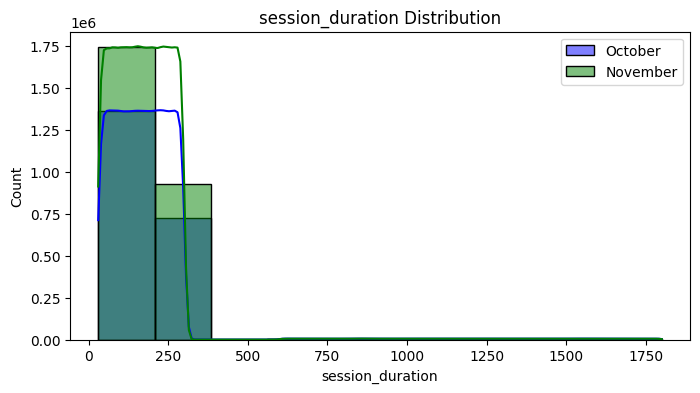

In [31]:
plot_column_distribution('session_duration')

Both October and November have a peak in session durations around 250 seconds, with most sessions being short. November has a slightly higher concentration of shorter sessions compared to October, but both distributions are right-skewed, indicating fewer long-duration sessions.

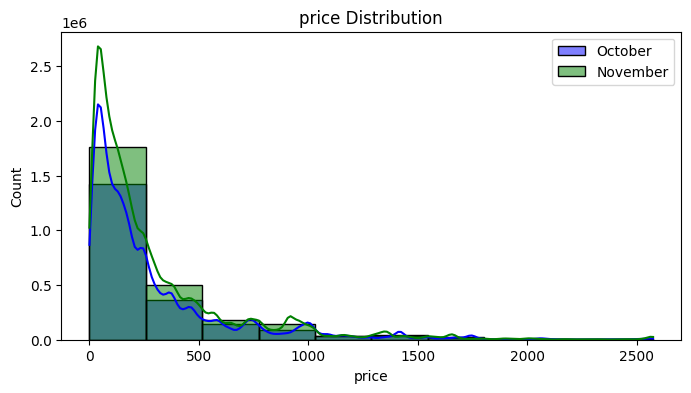

In [32]:
plot_column_distribution('price')

Both October and November have right-skewed price distributions, with most items priced low

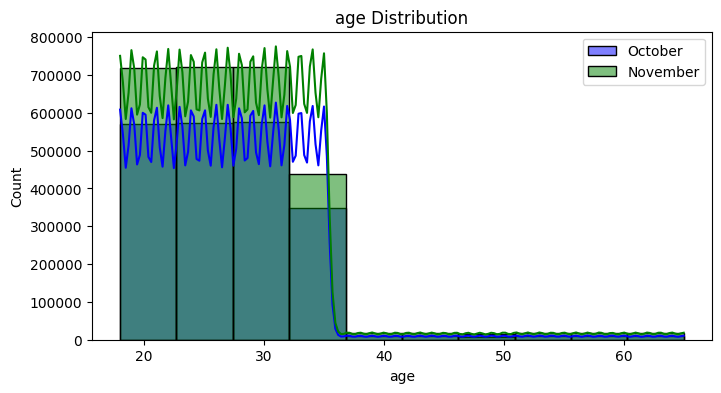

In [33]:
plot_column_distribution('age')

Both October and November show a peak in age distribution between 20 and 30 years, with regular oscillations. The majority of data points fall within this range, and there are very few data points beyond 40 years of age.

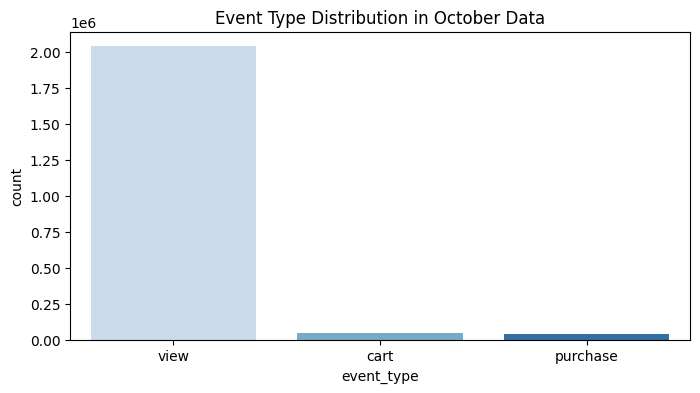

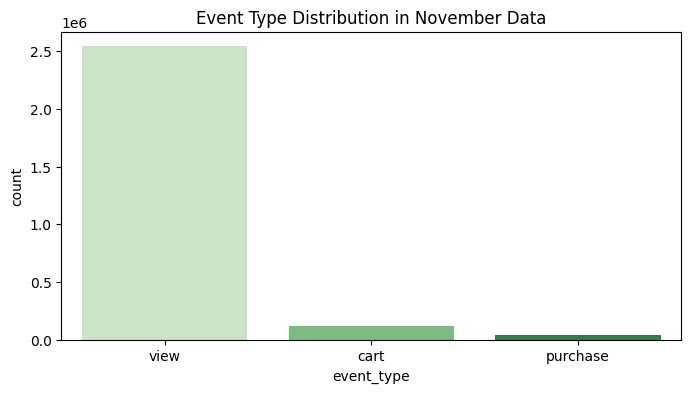

In [9]:
plt.figure(figsize=(8, 4))
plt.title('Event Type Distribution in October Data')
sns.countplot(x='event_type', hue='event_type', data=df_oct_sample, palette='Blues', legend=False)
plt.show()
plt.figure(figsize=(8, 4))
sns.countplot(x='event_type', hue='event_type', data=df_nov_sample, palette='Greens', legend=False)
plt.title('Event Type Distribution in November Data')
plt.show()

Both the October and November event type distributions show that the majority of events are *view* events, with a much smaller count for *cart* and *purchase* events.

In [63]:
def gender_distribution(sample_df):
    gender_counts = sample_df['gender'].value_counts()

    plt.figure(figsize=(5, 5))
    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
    plt.ylabel('')
    plt.show()

Gender Distribution in October Data Sample


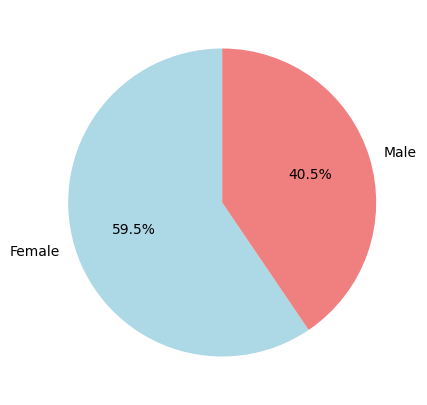

Gender Distribution in November Data Sample


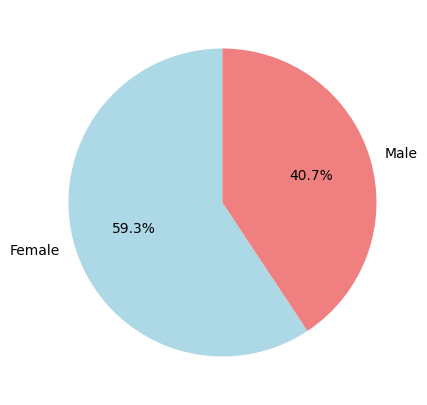

In [64]:
print('Gender Distribution in October Data Sample')
gender_distribution(df_oct_sample)
print('Gender Distribution in November Data Sample')
gender_distribution(df_nov_sample)

Both the October and November gender distributions show a slightly higher proportion of females (59.5% in October, 59.3% in November) compared to males (40.5% in October, 40.7% in November). The distribution is quite similar between the two months.

### Correlation matrix

In [58]:
def correlation_matrix(sample_df):
    correlation_matrix = sample_df[['session_duration', 'price', 'age', 'visit_count']].corr()
    plt.figure(figsize=(5, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

Correlation Matrix for October Data Sample:


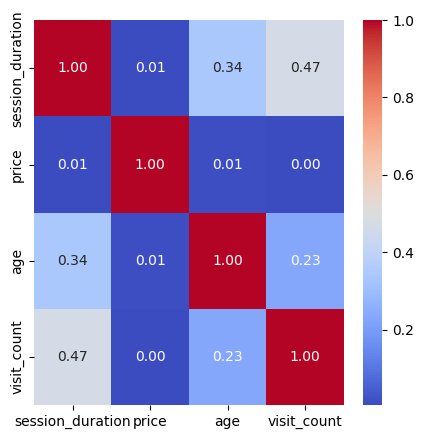

Correlation Matrix for November Data Sample:


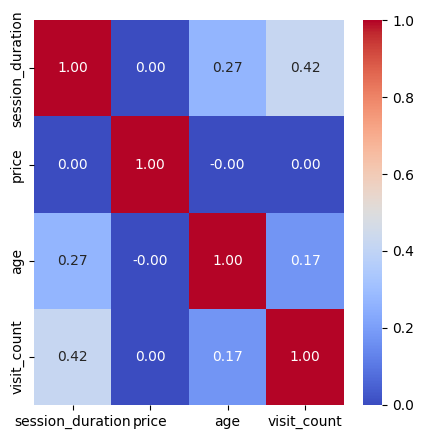

In [59]:
print("Correlation Matrix for October Data Sample:")
correlation_matrix(df_oct_sample)
print("Correlation Matrix for November Data Sample:")
correlation_matrix(df_nov_sample)

The **correlation matrix** for both October and November shows weak to moderate correlations. **Session duration** and **visit count** are positively correlated, with values of 0.47 in October and 0.42 in November. **Age** has a weak positive correlation with session duration in both months (0.34 in October, 0.27 in November). Other correlations are minimal.